<a id='top'></a>

# Record Linkage of FBref and TransferMarkt Datasets
##### Notebook to join the scraped datasets from [FBref.com](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/)  through [RecordLinkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players statistics and financial valuations.

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 01/09/2020<br>
Notebook last updated: 30/12/2020

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

![title](../../img/transfermarkt-logo-banner.png)

Click [here](#section5) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4) sections. Or click [here](#section6) to jump straight to the Conclusion.

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook joins datasets scraped from [FBref.com](https://fbref.com/en/) provided by [StatsBomb](https://statsbomb.com/) using X SCRAPER, and [TransferMarkt](https://www.transfermarkt.co.uk/) using the [Tyrone Mings web scraper](https://github.com/FCrSTATS/tyrone_mings) by [FCrSTATS](https://twitter.com/FC_rstats) through [RecordLinkage](https://pypi.org/project/recordlinkage/), to create one, unified source of information, that can be used for for further analysis of players statistics and financial valuations.scrapes data from [TransferMarkt](https://www.transfermarkt.co.uk/) using [Beautifulsoup](https://pypi.org/project/beautifulsoup4/) and the. This landed data is then manipulated as DataFrames using [pandas](http://pandas.pydata.org/).

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Teams](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      2.    [Outfielder Players](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br>
      3.    [Goalkeepers](#section3.4)<br>
            1.    [Data Dictionary](#section3.4.1)<br>
            2.    [Creating the DataFrame](#section3.4.2)<br>
            3.    [Initial Data Handling](#section3.4.3)<br>
            4.    [Export the Raw DataFrame](#section3.4.4)<br> 
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Teams](#section4.2)<br>
            1.    [Columns of Interest](#section4.2.1)<br>
            2.    [String Cleaning](#section4.2.2)<br>
            3.    [Converting Data Types](#section4.2.3)<br>
            4.    [Export the Engineered DataFrame](#section4.2.4)<br>
      3.    [Outfielder Players](#section4.3)<br>
            1.    [Columns of Interest](#section4.3.1)<br>
            2.    [String Cleaning](#section4.3.2)<br>
            3.    [Converting Data Types](#section4.3.3)<br>
            4.    [Export the Engineered DataFrame](#section4.3.4)<br>
      4.    [Goalkeepers](#section4.4)<br>
            1.    [Columns of Interest](#section4.4.1)<br>
            2.    [String Cleaning](#section4.4.2)<br>
            3.    [Converting Data Types](#section4.4.3)<br>
            4.    [Export the Engineered DataFrame](#section4.4.4)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    `tqdm` for a clean progress bar;
*    `requests` for executing HTTP requests;
*    [`RecordLinkage`](https://pypi.org/project/recordlinkage/) for joining of fuzzy datasets; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd    # version 1.0.3
import os    #  used to read the csv filenames
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Fuzzy Matching - Record Linkage
import recordlinkage
import jellyfish
import numexpr as ne

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno    # visually display missing data

# Progress Bar
from tqdm import tqdm    # a clean progress bar library

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.1
pandas: 1.0.1
matplotlib: 3.1.3
Seaborn: 0.10.0


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Define Data Paths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', )
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
data_dir_tm = os.path.join(base_dir, 'data', 'tm')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook explores how to fuzzy match scraped football data from [FBref.com](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), and [TransferMarkt](https://www.transfermarkt.co.uk/), using [RecordLinkage](https://pypi.org/project/recordlinkage/) and [pandas](http://pandas.pydata.org/) for data maniuplation through DataFrames.

The aims of this notebook is to result in two, finalised datasets of players and goalkeepers, exported to CSV. This data can be further analysis using python (see [Section 6](#section6) of this notebook), or can be explored using Tableau, PowerBI, Microsoft Excel. These datasets are the following:
*    outfield players
*    goalkeepers

The data used in this notebooks has been scraped using the [FBref](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/FBref.ipynb) and [TransferMarkt](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt.ipynb) webscraping notebooks.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into two subsections for the FBref and TransferMarkt datasets.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and Cleaned in the Data Engineering section [Section 4](#section4).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. FBref</a>
The FBref data comes in two forms:
*    outfield data
*    keeper data

#### <a id='#section3.2.1'>3.2.1. Import the Datasets</a>

##### Outfield

In [5]:
# Import data as a pandas DataFrame, df_fbref_outfield 

## Look for most recent CSV file
list_of_files_fbref_outfield = glob.glob(data_dir_fbref + '/engineered/outfield/*')    # * means all if need specific format then *.csv
filepath_latest_fbref_outfield = max(list_of_files_fbref_outfield, key=os.path.getctime)

## Load in most recently parsed CSV file
df_fbref_outfield = pd.read_csv(filepath_latest_fbref_outfield)

##### Goalkeeper

In [6]:
# Import data as a pandas DataFrame, df_fbref_goalkeeper

## Look for most recent CSV file
list_of_files_fbref_goalkeeper = glob.glob(data_dir_fbref + '/engineered/goalkeeper/*')
filepath_latest_fbref_goalkeeper = max(list_of_files_fbref_goalkeeper, key=os.path.getctime)

## Load in most recently parsed CSV file
df_fbref_goalkeeper = pd.read_csv(filepath_latest_fbref_goalkeeper)

#### <a id='#section3.2.2'>3.2.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

##### Outfield

In [7]:
# Display the first 5 rows of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,Yunis Abdelhamid,ma MAR,DF,Reims,32,1987,2.0,2.0,180.0,0.0,...,Reims,Ligue 1,France,yunis abdelhamid,yunis,abdelhamid,y,MAR,Morocco,Defender
1,Valon Berisha,xk KVX,"MF,FW",Reims,27,1993,2.0,0.0,95.0,0.0,...,Reims,Ligue 1,France,valon berisha,valon,berisha,v,KVX,Kosovo,Midfielder
2,El Bilal Touré,ml MLI,"FW,MF",Reims,18,2001,2.0,2.0,134.0,1.0,...,Reims,Ligue 1,France,el bilal toure,el,toure,e,MLI,Mali,Forward
3,Mathieu Cafaro,fr FRA,"FW,MF",Reims,23,1997,2.0,2.0,118.0,0.0,...,Reims,Ligue 1,France,mathieu cafaro,mathieu,cafaro,m,FRA,France,Forward
4,Moreto Cassamã,gw GNB,MF,Reims,22,1998,2.0,1.0,88.0,0.0,...,Reims,Ligue 1,France,moreto cassama,moreto,cassama,m,GNB,Guinea-Bissau,Midfielder


In [8]:
# Display the last 5 rows of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.tail()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
8396,Diego Rolán,uy URU,"FW,MF",Málaga,24,1993,26.0,21.0,1947.0,5.0,...,Málaga,La Liga,Spain,diego rolan,diego,rolan,d,URU,Uruguay,Forward
8397,Esteban Rolón,ar ARG,MF,Málaga,22,1995,8.0,6.0,415.0,0.0,...,Málaga,La Liga,Spain,esteban rolon,esteban,rolon,e,ARG,Argentina,Midfielder
8398,Roberto Rosales,ve VEN,DF,Málaga,28,1988,35.0,35.0,3122.0,1.0,...,Málaga,La Liga,Spain,roberto rosales,roberto,rosales,r,VEN,Venezuela,Defender
8399,Isaac Success,ng NGA,"MF,FW",Málaga,21,1996,9.0,7.0,490.0,0.0,...,Málaga,La Liga,Spain,isaac success,isaac,success,i,NGA,Nigeria,Midfielder
8400,Miguel Torres,es ESP,DF,Málaga,31,1986,8.0,8.0,672.0,0.0,...,Málaga,La Liga,Spain,miguel torres,miguel,torres,m,ESP,Spain,Defender


##### Goalkeeper

In [9]:
# Display the first 5 rows of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.head()

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,Walter Benítez,ar ARG,GK,Nice,27,1993,2.0,2.0,180.0,1.0,...,Nice,Ligue 1,France,walter benitez,walter,benitez,w,ARG,Argentina,Goalkeeper
1,Walter Benítez,ar ARG,GK,Nice,26,1993,26.0,26.0,2340.0,36.0,...,Nice,Ligue 1,France,walter benitez,walter,benitez,w,ARG,Argentina,Goalkeeper
2,Yannis Clementia,fr FRA,GK,Nice,22,1997,2.0,2.0,180.0,2.0,...,Nice,Ligue 1,France,yannis clementia,yannis,clementia,y,FRA,France,Goalkeeper
3,Walter Benítez,ar ARG,GK,Nice,25,1993,35.0,35.0,3150.0,29.0,...,Nice,Ligue 1,France,walter benitez,walter,benitez,w,ARG,Argentina,Goalkeeper
4,Yoan Cardinale,fr FRA,GK,Nice,24,1994,3.0,3.0,270.0,6.0,...,Nice,Ligue 1,France,yoan cardinale,yoan,cardinale,y,FRA,France,Goalkeeper


In [10]:
# Display the last 5 rows of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.tail()

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
625,Julian Pollersbeck,de GER,GK,Hamburger SV,22,1994,10.0,10.0,900.0,15.0,...,Hamburger SV,Bundesliga,Germany,julian pollersbeck,julian,pollersbeck,j,GER,Germany,Goalkeeper
626,Andrés Prieto,es ESP,GK,Málaga,23,1993,4.0,4.0,360.0,10.0,...,Málaga,La Liga,Spain,andres prieto,andres,prieto,a,ESP,Spain,Goalkeeper
627,Roberto,es ESP,GK,Málaga,31,1986,34.0,34.0,3060.0,51.0,...,Málaga,La Liga,Spain,roberto,roberto,roberto,r,ESP,Spain,Goalkeeper
628,Mamadou Samassa,ml MLI,GK,Troyes,27,1990,21.0,21.0,1890.0,31.0,...,Troyes,Ligue 1,France,mamadou samassa,mamadou,samassa,m,MLI,Mali,Goalkeeper
629,Erwin Zelazny,fr FRA,GK,Troyes,25,1991,17.0,17.0,1530.0,28.0,...,Troyes,Ligue 1,France,erwin zelazny,erwin,zelazny,e,FRA,France,Goalkeeper


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [11]:
# Print the shape of the raw DataFrame, df_fbref_outfield
print(df_fbref_outfield.shape)

(8401, 162)


In [12]:
# Print the shape of the raw DataFrame, df_fbref_goalkeeper
print(df_fbref_goalkeeper.shape)

(630, 58)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [13]:
# Features (column names) of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'team_name', 'league_name', 'league_country', 'player_lower',
       'firstname_lower', 'lastname_lower', 'firstinitial_lower',
       'nationality_code', 'nationality_cleaned', 'position_cleaned'],
      dtype='object', length=162)

In [14]:
# Features (column names) of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games_gk', 'games_starts_gk', 'minutes_gk', 'goals_against_gk',
       'goals_against_per90_gk', 'shots_on_target_against', 'saves',
       'save_pct', 'wins_gk', 'draws_gk', 'losses_gk', 'clean_sheets',
       'clean_sheets_pct', 'pens_att_gk', 'pens_allowed', 'pens_saved',
       'pens_missed_gk', 'minutes_90s_gk', 'free_kick_goals_against_gk',
       'corner_kick_goals_against_gk', 'own_goals_against_gk', 'psxg_gk',
       'psnpxg_per_shot_on_target_against', 'psxg_net_gk', 'psxg_net_per90_gk',
       'passes_completed_launched_gk', 'passes_launched_gk',
       'passes_pct_launched_gk', 'passes_gk', 'passes_throws_gk',
       'pct_passes_launched_gk', 'passes_length_avg_gk', 'goal_kicks',
       'pct_goal_kicks_launched', 'goal_kick_length_avg', 'crosses_gk',
       'crosses_stopped_gk', 'crosses_stopped_pct_gk',
       'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [15]:
# Data types of the features of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.dtypes

player                 object
nationality            object
position               object
squad                  object
age                     int64
                        ...  
lastname_lower         object
firstinitial_lower     object
nationality_code       object
nationality_cleaned    object
position_cleaned       object
Length: 162, dtype: object

In [16]:
# Data types of the features of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.dtypes

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                        int64
birth_year                                 int64
games_gk                                 float64
games_starts_gk                          float64
minutes_gk                               float64
goals_against_gk                         float64
goals_against_per90_gk                   float64
shots_on_target_against                  float64
saves                                    float64
save_pct                                 float64
wins_gk                                  float64
draws_gk                                 float64
losses_gk                                float64
clean_sheets                             float64
clean_sheets_pct                         float64
pens_att_gk                              float64
pens_allowed        

In [17]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_outfield.dtypes)

player                          object
nationality                     object
position                        object
squad                           object
age                              int64
birth_year                       int64
games                          float64
games_starts                   float64
minutes                        float64
goals                          float64
assists                        float64
pens_made                      float64
pens_att                       float64
cards_yellow                   float64
cards_red                      float64
goals_per90                    float64
assists_per90                  float64
goals_assists_per90            float64
goals_pens_per90               float64
goals_assists_pens_per90       float64
xg                             float64
npxg                           float64
xa                             float64
xg_per90                       float64
xa_per90                       float64
xg_xa_per90              

In [18]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_goalkeeper.dtypes)

player                                    object
nationality                               object
position                                  object
squad                                     object
age                                        int64
birth_year                                 int64
games_gk                                 float64
games_starts_gk                          float64
minutes_gk                               float64
goals_against_gk                         float64
goals_against_per90_gk                   float64
shots_on_target_against                  float64
saves                                    float64
save_pct                                 float64
wins_gk                                  float64
draws_gk                                 float64
losses_gk                                float64
clean_sheets                             float64
clean_sheets_pct                         float64
pens_att_gk                              float64
pens_allowed        

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [19]:
# Info for the raw DataFrame, df_fbref_outfield
df_fbref_outfield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8401 entries, 0 to 8400
Columns: 162 entries, player to position_cleaned
dtypes: float64(145), int64(2), object(15)
memory usage: 10.4+ MB


In [20]:
# Info for the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   player                                 630 non-null    object 
 1   nationality                            630 non-null    object 
 2   position                               630 non-null    object 
 3   squad                                  630 non-null    object 
 4   age                                    630 non-null    int64  
 5   birth_year                             630 non-null    int64  
 6   games_gk                               630 non-null    float64
 7   games_starts_gk                        630 non-null    float64
 8   minutes_gk                             630 non-null    float64
 9   goals_against_gk                       630 non-null    float64
 10  goals_against_per90_gk                 630 non-null    float64
 11  shots_

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [21]:
# Description of the raw DataFrame, df_fbref_outfield, showing some summary statistics for each numberical column in the DataFrame
df_fbref_outfield.describe()

,age,birth_year,games,games_starts,minutes,goals,assists,pens_made,pens_att,cards_yellow,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,...,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,25.267944,1990.784668,17.947982,14.122843,1268.033448,1.714201,1.171765,0.158791,0.204857,2.607785,...,16.157362,15.497203,2.567909,0.155220,0.188668,0.049756,118.865611,17.528747,17.528866,39.692049
std,4.510198,57.671780,11.656105,11.424468,995.497956,3.331538,1.958533,0.718975,0.854013,2.788383,...,15.389568,16.862703,5.295320,0.488875,0.481065,0.233810,109.070134,24.185059,21.588515,25.566109
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1989.000000,7.000000,3.000000,305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,2.000000,22.200000
50%,25.000000,1993.000000,18.000000,12.000000,1129.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,13.000000,10.000000,0.000000,0.000000,0.000000,0.000000,92.000000,9.000000,11.000000,42.900000
75%,28.000000,1996.000000,28.000000,24.000000,2079.000000,2.000000,2.000000,0.000000,0.000000,4.000000,...,25.000000,23.000000,2.000000,0.000000,0.000000,0.000000,186.000000,24.000000,25.000000,57.400000
max,41.000000,2004.000000,38.000000,38.000000,3420.000000,36.000000,21.000000,14.000000,15.000000,17.000000,...,98.000000,167.000000,56.000000,6.000000,5.000000,4.000000,597.000000,266.000000,290.000000,100.000000


In [22]:
# Description of the raw DataFrame, df_fbref_goalkeeper, showing some summary statistics for each numberical column in the DataFrame
df_fbref_goalkeeper.describe()

,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,goals_against_per90_gk,shots_on_target_against,saves,save_pct,...,passes_length_avg_gk,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,27.725397,1986.804762,17.325397,17.131746,1540.707937,23.566667,1.498381,71.482540,50.382540,0.674305,...,40.165397,123.338095,66.849841,51.427143,160.739683,12.628571,7.716032,10.795238,0.632619,14.299206
std,4.866663,79.427973,14.046838,14.170216,1268.461912,19.878194,0.875075,60.487307,43.415594,0.159751,...,8.259086,108.206737,23.981861,13.386060,137.569530,11.991590,5.849282,11.218072,0.515104,2.974131
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1986.000000,3.000000,3.000000,245.500000,4.000000,1.012500,12.000000,8.000000,0.634250,...,34.725000,18.000000,50.600000,43.725000,24.000000,2.000000,4.825000,2.000000,0.322500,13.000000
50%,28.000000,1990.000000,15.000000,15.000000,1337.000000,21.000000,1.410000,62.500000,41.500000,0.694000,...,40.300000,101.000000,69.400000,52.950000,137.000000,10.000000,7.500000,7.000000,0.545000,14.300000
75%,31.000000,1993.000000,33.000000,33.000000,2920.250000,40.000000,1.760000,127.000000,91.000000,0.750000,...,44.975000,216.750000,87.075000,61.475000,285.000000,21.000000,9.800000,17.000000,0.910000,15.775000
max,41.000000,2001.000000,38.000000,38.000000,3420.000000,76.000000,11.250000,231.000000,167.000000,1.000000,...,61.600000,451.000000,100.000000,79.300000,569.000000,53.000000,66.700000,59.000000,4.000000,27.500000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

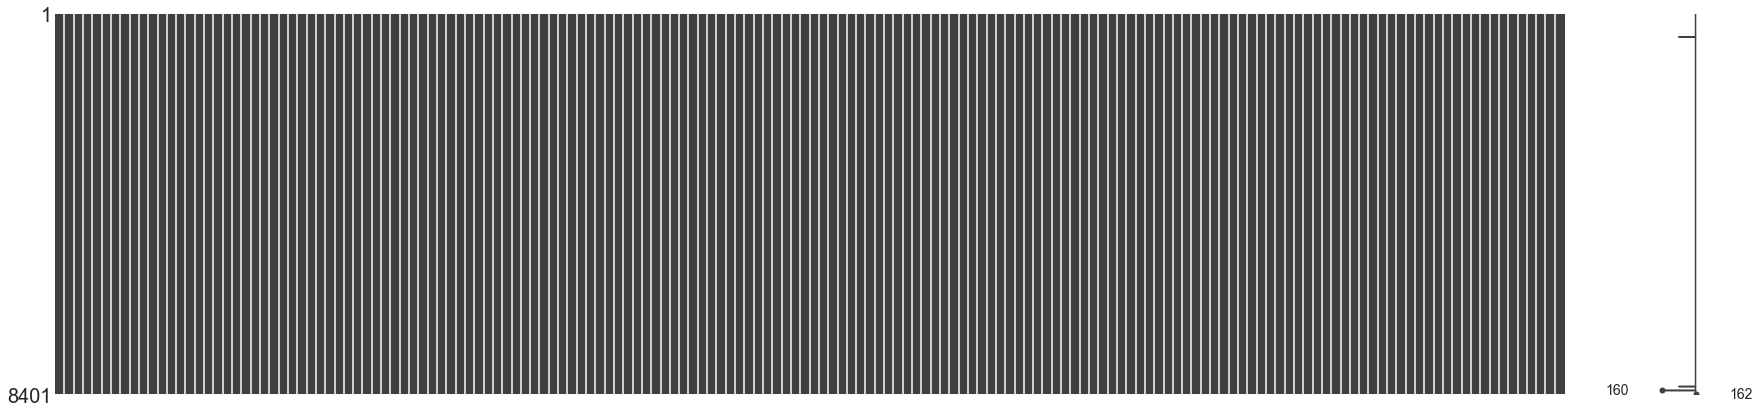

In [23]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_outfield
msno.matrix(df_fbref_outfield, figsize = (30, 7))

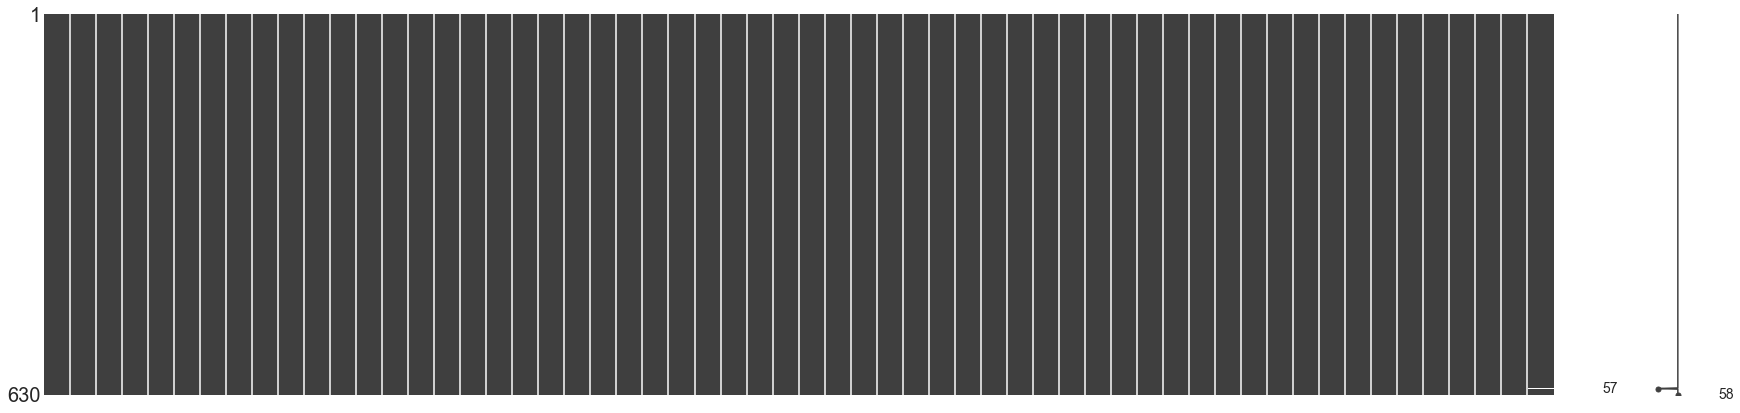

In [24]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_goalkeeper
msno.matrix(df_fbref_goalkeeper, figsize = (30, 7))

In [25]:
# Counts of missing values
null_value_stats = df_fbref_outfield.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

nationality_cleaned    2
position_cleaned       2
dtype: int64

In [26]:
# Counts of missing values
null_value_stats = df_fbref_goalkeeper.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

position_cleaned    1
dtype: int64

The visualisation shows us very quickly that there are no missing values in either of the datasets.

### <a id='#section3.3'>3.3. TransferMarkt</a>

#### <a id='#section3.3.1'>3.3.1. Import the Datasets</a>

##### Outfield

In [27]:
# Import data as a pandas DataFrame, df_tm_outfield 

## Look for most recent CSV file
list_of_files_tm_outfield = glob.glob(data_dir_tm + '/engineered/player/*')    # * means all if need specific format then *.csv
filepath_latest_tm_outfield = max(list_of_files_tm_outfield, key=os.path.getctime)

## Load in most recently parsed CSV file
df_tm_outfield = pd.read_csv(filepath_latest_tm_outfield)

##### Goalkeeper

In [28]:
# Import data as a pandas DataFrame, df_tm_goalkeeper

## Look for most recent CSV file
list_of_files_tm_goalkeeper = glob.glob(data_dir_tm + '/engineered/goalkeeper/*')    # * means all if need specific format then *.csv
filepath_latest_tm_goalkeeper = max(list_of_files_tm_goalkeeper, key=os.path.getctime)

## Load in most recently parsed CSV file
df_tm_goalkeeper= pd.read_csv(filepath_latest_tm_goalkeeper)

#### <a id='#section3.3.2'>3.3.2. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

##### Outfield

In [29]:
# Display the first 5 rows of the raw DataFrame, df_tm_outfield
df_tm_outfield.head()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
0,Clément Lenglet,clement lenglet,c,clement,lenglet,Centre-Back,Defender,43200000.0,1995-06-17,1995.0,6.0,25.0,France
1,Samuel Umtiti,samuel umtiti,s,samuel,umtiti,Centre-Back,Defender,28800000.0,1993-11-14,1993.0,11.0,26.0,France
2,Gerard Piqué,gerard pique,g,gerard,pique,Centre-Back,Defender,18000000.0,1987-02-02,1987.0,2.0,33.0,Spain
3,Jean-Clair Todibo,jean-clair todibo,j,jean-clair,todibo,Centre-Back,Defender,12600000.0,1999-12-30,1999.0,12.0,20.0,France
4,Ronald Araújo,ronald araujo,r,ronald,araujo,Centre-Back,Defender,9000000.0,1999-03-07,1999.0,3.0,21.0,Uruguay


In [30]:
# Display the last 5 rows of the raw DataFrame, df_tm_outfield
df_tm_outfield.tail()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
2571,Sergio Córdova,sergio cordova,s,sergio,cordova,Centre-Forward,Forward,1440000.0,1997-08-09,1997.0,8.0,23.0,Venezuela
2572,Fabian Klos,fabian klos,f,fabian,klos,Centre-Forward,Forward,900000.0,1987-12-02,1987.0,12.0,32.0,Germany
2573,Sebastian Müller,sebastian muller,s,sebastian,muller,Centre-Forward,Forward,270000.0,2001-01-23,2001.0,1.0,19.0,Germany
2574,Sven Schipplock,sven schipplock,s,sven,schipplock,Centre-Forward,Forward,270000.0,1988-11-08,1988.0,11.0,31.0,Germany
2575,Prince Osei Owusu,prince osei owusu,p,prince,owusu,Centre-Forward,Forward,225000.0,1997-01-07,1997.0,1.0,23.0,Germany


##### Goalkeeper

In [31]:
# Display the first 5 rows of the raw DataFrame, df_tm_goalkeeper
df_tm_goalkeeper.head()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
0,Marc-André ter Stegen,marc-andre ter stegen,m,marc-andre,stegen,Goalkeeper,Goalkeeper,64800000.0,1992-04-30,1992.0,4.0,28.0,Germany
1,Neto,neto,n,neto,neto,Goalkeeper,Goalkeeper,13050000.0,1989-07-19,1989.0,7.0,31.0,Brazil
2,Iñaki Peña,inaki pena,i,inaki,pena,Goalkeeper,Goalkeeper,2070000.0,1999-03-02,1999.0,3.0,21.0,Spain
3,Thibaut Courtois,thibaut courtois,t,thibaut,courtois,Goalkeeper,Goalkeeper,54000000.0,1992-05-11,1992.0,5.0,28.0,Belgium
4,Andriy Lunin,andriy lunin,a,andriy,lunin,Goalkeeper,Goalkeeper,2430000.0,1999-02-11,1999.0,2.0,21.0,Ukraine


In [32]:
# Display the last 5 rows of the raw DataFrame, df_tm_goalkeeper
df_tm_goalkeeper.tail()

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
309,Andreas Luthe,andreas luthe,a,andreas,luthe,Goalkeeper,Goalkeeper,360000.0,1987-03-10,1987.0,3.0,33.0,Germany
310,Jakob Busk,jakob busk,j,jakob,busk,Goalkeeper,Goalkeeper,270000.0,1993-09-12,1993.0,9.0,26.0,Denmark
311,Stefan Ortega Moreno,stefan ortega moreno,s,stefan,moreno,Goalkeeper,Goalkeeper,1350000.0,1992-11-06,1992.0,11.0,27.0,Germany
312,Oscar Linnér,oscar linner,o,oscar,linner,Goalkeeper,Goalkeeper,540000.0,1997-02-23,1997.0,2.0,23.0,Sweden
313,Nikolai Rehnen,nikolai rehnen,n,nikolai,rehnen,Goalkeeper,Goalkeeper,90000.0,1997-02-04,1997.0,2.0,23.0,Germany


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [33]:
# Print the shape of the raw DataFrame, df_tm_outfield
print(df_tm_outfield.shape)

(2576, 13)


In [34]:
# Print the shape of the raw DataFrame, df_tm_goalkeeper
print(df_tm_goalkeeper.shape)

(314, 13)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [35]:
# Features (column names) of the raw DataFrame, df_fbref_outfield
df_fbref_outfield.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games', 'games_starts', 'minutes', 'goals',
       ...
       'team_name', 'league_name', 'league_country', 'player_lower',
       'firstname_lower', 'lastname_lower', 'firstinitial_lower',
       'nationality_code', 'nationality_cleaned', 'position_cleaned'],
      dtype='object', length=162)

In [36]:
# Features (column names) of the raw DataFrame, df_fbref_goalkeeper
df_fbref_goalkeeper.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games_gk', 'games_starts_gk', 'minutes_gk', 'goals_against_gk',
       'goals_against_per90_gk', 'shots_on_target_against', 'saves',
       'save_pct', 'wins_gk', 'draws_gk', 'losses_gk', 'clean_sheets',
       'clean_sheets_pct', 'pens_att_gk', 'pens_allowed', 'pens_saved',
       'pens_missed_gk', 'minutes_90s_gk', 'free_kick_goals_against_gk',
       'corner_kick_goals_against_gk', 'own_goals_against_gk', 'psxg_gk',
       'psnpxg_per_shot_on_target_against', 'psxg_net_gk', 'psxg_net_per90_gk',
       'passes_completed_launched_gk', 'passes_launched_gk',
       'passes_pct_launched_gk', 'passes_gk', 'passes_throws_gk',
       'pct_passes_launched_gk', 'passes_length_avg_gk', 'goal_kicks',
       'pct_goal_kicks_launched', 'goal_kick_length_avg', 'crosses_gk',
       'crosses_stopped_gk', 'crosses_stopped_pct_gk',
       'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [37]:
# Data types of the features of the raw DataFrame, df_tm_outfield
df_tm_outfield.dtypes

name                             object
name_lower                       object
firstinitial_lower               object
firstname_lower                  object
lastname_lower                   object
position_description             object
position_description_cleaned     object
value                           float64
birth_date                       object
birth_year                      float64
birth_month                     float64
age                             float64
playing_country                  object
dtype: object

In [38]:
# Data types of the features of the raw DataFrame, df_tm_goalkeeper
df_tm_goalkeeper.dtypes

name                             object
name_lower                       object
firstinitial_lower               object
firstname_lower                  object
lastname_lower                   object
position_description             object
position_description_cleaned     object
value                           float64
birth_date                       object
birth_year                      float64
birth_month                     float64
age                             float64
playing_country                  object
dtype: object

In [39]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tm_outfield.dtypes)

name                             object
name_lower                       object
firstinitial_lower               object
firstname_lower                  object
lastname_lower                   object
position_description             object
position_description_cleaned     object
value                           float64
birth_date                       object
birth_year                      float64
birth_month                     float64
age                             float64
playing_country                  object
dtype: object


In [40]:
# Displays all one hundered and four columns, commented out but shown for reference
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tm_goalkeeper.dtypes)

name                             object
name_lower                       object
firstinitial_lower               object
firstname_lower                  object
lastname_lower                   object
position_description             object
position_description_cleaned     object
value                           float64
birth_date                       object
birth_year                      float64
birth_month                     float64
age                             float64
playing_country                  object
dtype: object


The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [41]:
# Info for the raw DataFrame, df_tm_outfield
df_tm_outfield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          2576 non-null   object 
 1   name_lower                    2576 non-null   object 
 2   firstinitial_lower            2576 non-null   object 
 3   firstname_lower               2576 non-null   object 
 4   lastname_lower                2576 non-null   object 
 5   position_description          2576 non-null   object 
 6   position_description_cleaned  2575 non-null   object 
 7   value                         2543 non-null   float64
 8   birth_date                    2575 non-null   object 
 9   birth_year                    2575 non-null   float64
 10  birth_month                   2575 non-null   float64
 11  age                           2575 non-null   float64
 12  playing_country               2576 non-null   object 
dtypes: 

In [42]:
# Info for the raw DataFrame, df_tm_goalkeeper
df_tm_goalkeeper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          314 non-null    object 
 1   name_lower                    314 non-null    object 
 2   firstinitial_lower            314 non-null    object 
 3   firstname_lower               314 non-null    object 
 4   lastname_lower                314 non-null    object 
 5   position_description          314 non-null    object 
 6   position_description_cleaned  314 non-null    object 
 7   value                         310 non-null    float64
 8   birth_date                    314 non-null    object 
 9   birth_year                    314 non-null    float64
 10  birth_month                   314 non-null    float64
 11  age                           314 non-null    float64
 12  playing_country               314 non-null    object 
dtypes: fl

The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [43]:
# Description of the raw DataFrame, df_tm_outfield, showing some summary statistics for each numberical column in the DataFrame
df_tm_outfield.describe()

,value,birth_year,birth_month,age
count,2.543000e+03,2575.000000,2575.000000,2575.000000
mean,8.649224e+06,1994.323883,5.791068,25.419417
std,1.372822e+07,4.303550,3.447666,4.299176
min,4.500000e+04,1977.000000,1.000000,15.000000
25%,1.080000e+06,1991.000000,3.000000,22.000000
50%,3.240000e+06,1995.000000,5.000000,25.000000
75%,1.080000e+07,1998.000000,9.000000,29.000000
max,1.620000e+08,2004.000000,12.000000,42.000000


In [44]:
# Description of the raw DataFrame, df_tm_goalkeeper, showing some summary statistics for each numberical column in the DataFrame
df_tm_goalkeeper.describe()

,value,birth_year,birth_month,age
count,3.100000e+02,314.000000,314.000000,314.000000
mean,4.513742e+06,1992.722930,5.757962,27.012739
std,9.613479e+06,5.399945,3.460228,5.412667
min,2.300000e+04,1978.000000,1.000000,17.000000
25%,2.700000e+05,1988.250000,3.000000,23.000000
50%,1.080000e+06,1993.000000,5.000000,27.000000
75%,4.837500e+06,1997.000000,9.000000,31.000000
max,7.200000e+07,2003.000000,12.000000,42.000000


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

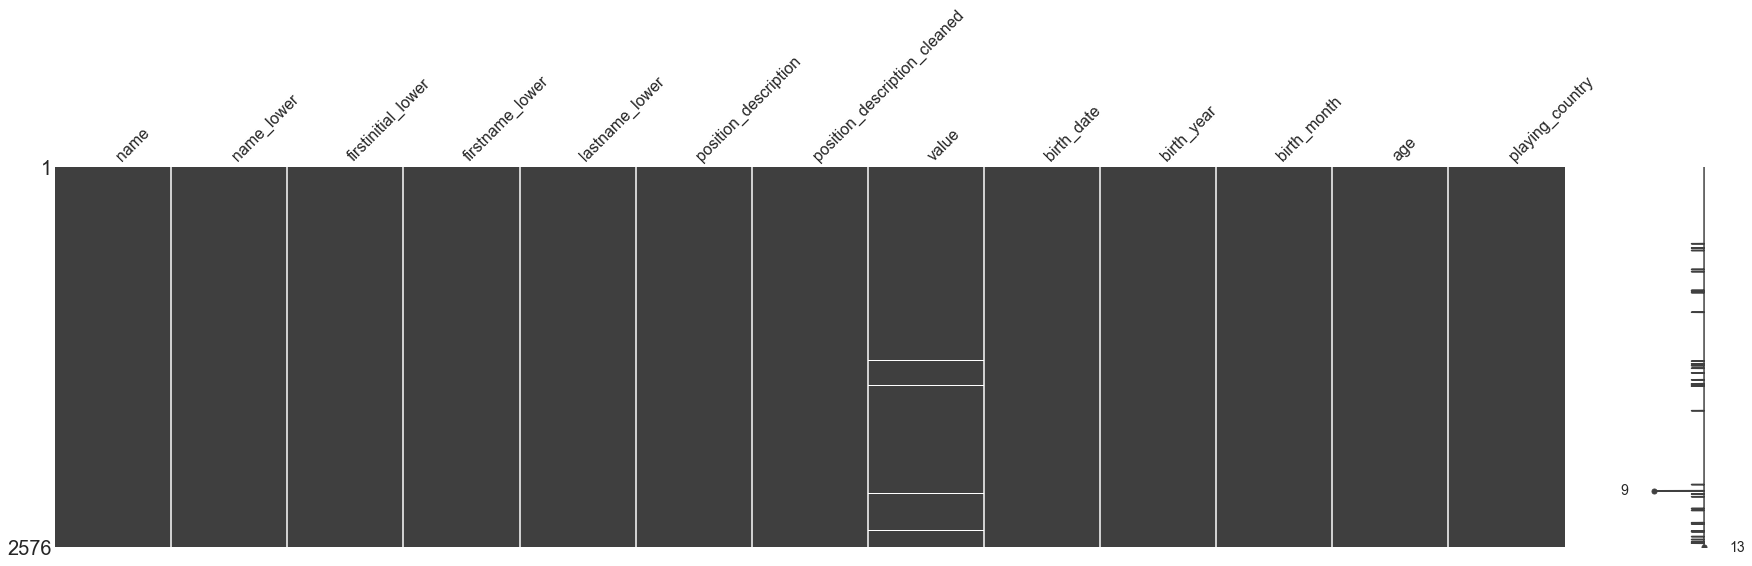

In [45]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_outfield
msno.matrix(df_tm_outfield, figsize = (30, 7))

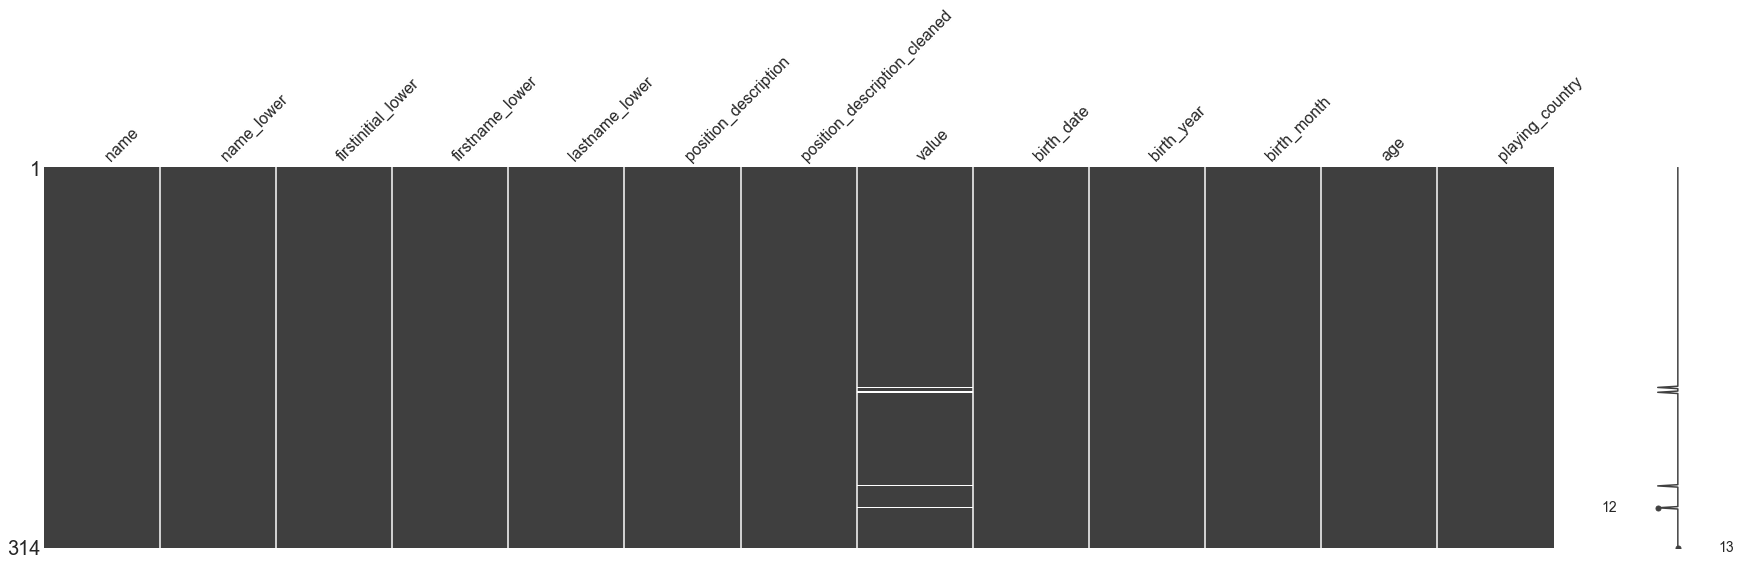

In [46]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tm_goalkeeper
msno.matrix(df_tm_goalkeeper, figsize = (30, 7))

In [47]:
# Counts of missing values
null_value_stats = df_tm_outfield.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

position_description_cleaned     1
value                           33
birth_date                       1
birth_year                       1
birth_month                      1
age                              1
dtype: int64

In [48]:
# Counts of missing values
null_value_stats = df_tm_goalkeeper.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

value    4
dtype: int64

The visualisation shows us very quickly that there very few missing values in either of the outfield or goalkeeper datasets, and therefore this data is ready to be joined to the [FBref](https://fbref.com/en/) data.

## <a id='#section4'>4. Fuzzy Match Datasets - Record Linkage</a>

### <a id='#section4.1'>4.1. Introduction</a>
Now we have our two engineered DataFrames for [FBref](https://fbref.com/en/) and [TransferMarkt](https://www.transfermarkt.co.uk/) data, we are now read to merge them to form one dataset.

We are required to join two data sets together that do not have a common unique identifier and are required to use a third-party Python library - [record linkage](https://pypi.org/project/recordlinkage/), installed using pip install recordlinkage. [record linkage](https://pypi.org/project/recordlinkage/) provides a simple interface to link records in or between data sources. 

<b>'Record linkage'</b> is the term used by statisticians, epidemiologists, and historians, among others, to describe the process of joining records from one data source with another that describe the same entity ([source](https://en.wikipedia.org/wiki/Record_linkage)).

Record linkage is necessary when joining different data sets based on entities that may or may not share a common identifier (e.g., database key, URI, National identification number), which may be due to differences in record shape, storage location, or curator style or preference. A data set that has undergone RL-oriented reconciliation may be referred to as being cross-linked. Record linkage is referred to as data linkage in many jurisdictions, but the two are the same process.

The toolkit provides most of the tools needed for record linkage and deduplication. The package contains indexing methods, functions to compare records and classifiers. The package is developed for research and the linking of small or medium sized files.

For a full guide on how to use record linkage, see the official documentation [here](https://recordlinkage.readthedocs.io/en/latest/) and also this worked example by [Chris Moffitt](https://twitter.com/chris1610) [here](https://pbpython.com/record-linking.html)

### <a id='#section4.2'>4.2. Join the Datasets using Record Linkage</a>

#### <a id='#section4.2.1'>4.2.1. Outfielder Datasets</a>

The first step is to create a indexer object.

The indexing module is used to make pairs of records. These pairs are called candidate links or candidate matches. There are several indexing algorithms available such as blocking and sorted neighborhood indexing. See the following references for background information about indexation

One key concept is that we can use blocking to limit the number of comparisons. For instance, we know that it is very likely that we only want to compare records that have the same last name, first name initial and birth year. We can use this knowledge to setup a block on these columns in both DataFrames:

In [49]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year'], 
              right_on = ['firstinitial_lower', 'birth_year'])    # removed 'age' as they don't match in the two datasets

<Index>

The next step is to build up all the potential candidates to check:

In [50]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_outfield, df_tm_outfield)
print(len(candidates))

85913


Now that we have defined the left and right data sets and all the candidates, we can define how we want to perform the comparison logic using `Compare()`:

In [51]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position_grouped',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality_cleaned',
               'playing_country',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

features = compare.compute(candidates, df_fbref_outfield, df_tm_outfield)

View the potential candidates

In [52]:
# Record Linkage Step 4 - view the potential candidates
features

first_name  last_name  position  nationality
0    846          1.0        1.0       1.0          1.0
18   846          1.0        1.0       1.0          1.0
44   846          1.0        1.0       1.0          1.0
3980 846          0.0        0.0       1.0          0.0
1    854          1.0        1.0       1.0          1.0
...               ...        ...       ...          ...
7444 140          1.0        1.0       1.0          1.0
     1780         0.0        0.0       0.0          0.0
7518 140          0.0        0.0       0.0          0.0
     1780         1.0        1.0       1.0          1.0
7099 507          0.0        0.0       0.0          0.0

[85913 rows x 4 columns]

This DataFrame shows the results of all of the comparisons. There is one row for each row in the Company House and Fan360 DataFrames. The columns correspond to the comparisons we defined. A 1 is a match and 0 is not.

Given the large number of records with no matches, it is a little hard to see how many matches we might have. We can sum up the individual scores to see about the quality of the matches.

In [53]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

4.0     4393
3.0     1157
2.0     4610
1.0    29388
0.0    46365
dtype: int64

To only include high-quality matches, let’s just take all the records with 4 matches out of 4 and create a total score column:

In [54]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 4].reset_index()
potential_matches

,level_0,level_1,first_name,last_name,position,nationality
0,0,846,1.0,1.0,1.0,1.0
1,18,846,1.0,1.0,1.0,1.0
2,44,846,1.0,1.0,1.0,1.0
3,1,854,1.0,1.0,1.0,1.0
4,1980,854,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
4388,6410,1883,1.0,1.0,1.0,1.0
4389,6440,1883,1.0,1.0,1.0,1.0
4390,7008,1780,1.0,1.0,1.0,1.0
4391,7444,140,1.0,1.0,1.0,1.0


In [55]:
potential_matches['Score'] = potential_matches.loc[:, 'first_name': 'nationality'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,position,nationality,Score
0,0,846,1.0,1.0,1.0,1.0,4.0
1,18,846,1.0,1.0,1.0,1.0,4.0
2,44,846,1.0,1.0,1.0,1.0,4.0
3,1,854,1.0,1.0,1.0,1.0,4.0
4,1980,854,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...
4388,6410,1883,1.0,1.0,1.0,1.0,4.0
4389,6440,1883,1.0,1.0,1.0,1.0,4.0
4390,7008,1780,1.0,1.0,1.0,1.0,4.0
4391,7444,140,1.0,1.0,1.0,1.0,4.0


In [56]:
# Join the FBref Outfielder DataFrame to the potential matches DataFrame
df_merge_outfield = pd.merge(potential_matches, df_fbref_outfield, left_on='level_0', right_index=True)

# Join the TransferMarkt Outfielder DataFrame to the potential matches DataFrame
df_merge_outfield = pd.merge(df_merge_outfield, df_tm_outfield, left_on='level_1', right_index=True)

Now that we've merged the DataFrames, the next step is to clean the DataFrame, reorder the columns, and only keep the columns of interest.

In [57]:
df_merge_outfield

,level_0,level_1,first_name,last_name,position_x,nationality_x,Score,player,nationality_y,position_y,...,firstname_lower_y,lastname_lower_y,position_description,position_description_cleaned,value,birth_date,birth_year_y,birth_month,age_y,playing_country
0,0,846,1.0,1.0,1.0,1.0,4.0,Yunis Abdelhamid,ma MAR,DF,...,yunis,abdelhamid,Centre-Back,Defender,1800000.0,1987-09-28,1987.0,9.0,32.0,Morocco
1,18,846,1.0,1.0,1.0,1.0,4.0,Yunis Abdelhamid,ma MAR,DF,...,yunis,abdelhamid,Centre-Back,Defender,1800000.0,1987-09-28,1987.0,9.0,32.0,Morocco
2,44,846,1.0,1.0,1.0,1.0,4.0,Yunis Abdelhamid,ma MAR,DF,...,yunis,abdelhamid,Centre-Back,Defender,1800000.0,1987-09-28,1987.0,9.0,32.0,Morocco
3,1,854,1.0,1.0,1.0,1.0,4.0,Valon Berisha,xk KVX,"MF,FW",...,valon,berisha,Central Midfield,Midfielder,3600000.0,1993-02-07,1993.0,2.0,27.0,Kosovo
4,1980,854,1.0,1.0,1.0,1.0,4.0,Valon Berisha,xk KVX,"MF,FW",...,valon,berisha,Central Midfield,Midfielder,3600000.0,1993-02-07,1993.0,2.0,27.0,Kosovo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4388,6410,1883,1.0,1.0,1.0,1.0,4.0,Rodrigo Palacio,ar ARG,FW,...,rodrigo,palacio,Centre-Forward,Forward,360000.0,1982-02-05,1982.0,2.0,38.0,Argentina
4389,6440,1883,1.0,1.0,1.0,1.0,4.0,Rodrigo Palacio,ar ARG,"FW,MF",...,rodrigo,palacio,Centre-Forward,Forward,360000.0,1982-02-05,1982.0,2.0,38.0,Argentina
4390,7008,1780,1.0,1.0,1.0,1.0,4.0,Hamed Junior Traorè,ci CIV,"MF,FW",...,hamed,traore,Attacking Midfield,Midfielder,12600000.0,2000-02-16,2000.0,2.0,20.0,Cote d'Ivoire
4392,7518,1780,1.0,1.0,1.0,1.0,4.0,Hamed Junior Traorè,ci CIV,MF,...,hamed,traore,Attacking Midfield,Midfielder,12600000.0,2000-02-16,2000.0,2.0,20.0,Cote d'Ivoire


In [58]:
# Select columns of interest
cols_merge_outfield = ['player', 'nationality_cleaned', 'nationality_code', 'position_description', 'value', 'birth_date', 'age_y', 'Score']

# Create more concise DataFrame using only columns of interest
df_merge_outfield_select = df_merge_outfield[cols_merge_outfield]

# Order rows by 'value' and matching 'Score' decending (i.e. best matches of 4 out of 4 at the top) 
df_merge_outfield_select = df_merge_outfield_select.sort_values(by=['value', 'player'], ascending=[False, True])

In [59]:
df_merge_outfield_select

,player,nationality_cleaned,nationality_code,position_description,value,birth_date,age_y,Score
241,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21.0,4.0
244,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21.0,4.0
245,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21.0,4.0
246,Kylian Mbappé,France,FRA,Centre-Forward,162000000.0,1998-12-20,21.0,4.0
3398,Neymar,Brazil,BRA,Left Winger,115200000.0,1992-02-05,28.0,4.0
...,...,...,...,...,...,...,...,...
2233,Brandon Pierrick,England,ENG,Attacking Midfield,NaN,2001-12-10,18.0,4.0
9,Evann Guessand,France,FRA,Centre-Forward,NaN,2001-07-01,19.0,4.0
2323,Jake Vokins,England,ENG,Left-Back,NaN,2000-03-17,20.0,4.0
2381,Mehdi Zerkane,France,FRA,Attacking Midfield,NaN,1999-07-15,21.0,4.0


In [60]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final_outfield = pd.merge(df_fbref_outfield, df_merge_outfield_select, left_on='player', right_on='player')

In [61]:
# Select columns of interest
cols_final_outfield = ['player', 'value', 'nationality_cleaned_y', 'position_description', 'squad', 'league_name', 'league_country', 'birth_date', 'age_y', 'games', 'games_starts', 'minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'cards_yellow', 'cards_red', 'goals_per90', 'assists_per90', 'goals_assists_per90', 'goals_pens_per90', 'goals_assists_pens_per90', 'xg', 'npxg', 'xa', 'xg_per90', 'xa_per90', 'xg_xa_per90', 'npxg_per90', 'npxg_xa_per90', 'minutes_90s', 'shots_total', 'shots_on_target', 'shots_free_kicks', 'shots_on_target_pct', 'shots_total_per90', 'shots_on_target_per90', 'goals_per_shot', 'goals_per_shot_on_target', 'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_completed', 'passes', 'passes_pct', 'passes_total_distance', 'passes_progressive_distance', 'passes_completed_short', 'passes_short', 'passes_pct_short', 'passes_completed_medium', 'passes_medium', 'passes_pct_medium', 'passes_completed_long', 'passes_long', 'passes_pct_long', 'xa_net', 'assisted_shots', 'passes_into_final_third', 'passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes', 'passes_live', 'passes_dead', 'passes_free_kicks', 'through_balls', 'passes_pressure', 'passes_switches', 'crosses', 'corner_kicks', 'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight', 'passes_ground', 'passes_low', 'passes_high', 'passes_left_foot', 'passes_right_foot', 'passes_head', 'throw_ins', 'passes_other_body', 'passes_offsides', 'passes_oob', 'passes_intercepted', 'passes_blocked', 'sca', 'sca_per90', 'sca_passes_live', 'sca_passes_dead', 'sca_dribbles', 'sca_shots', 'sca_fouled', 'gca', 'gca_per90', 'gca_passes_live', 'gca_passes_dead', 'gca_dribbles', 'gca_shots', 'gca_fouled', 'gca_og_for', 'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'dribble_tackles', 'dribbles_vs', 'dribble_tackles_pct', 'dribbled_past', 'pressures', 'pressure_regains', 'pressure_regain_pct', 'pressures_def_3rd', 'pressures_mid_3rd', 'pressures_att_3rd', 'blocks', 'blocked_shots', 'blocked_shots_saves', 'blocked_passes', 'interceptions', 'clearances', 'errors', 'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd', 'touches_att_pen_area', 'touches_live_ball', 'dribbles_completed', 'dribbles', 'dribbles_completed_pct', 'players_dribbled_past', 'nutmegs', 'carries', 'carry_distance', 'carry_progressive_distance', 'pass_targets', 'passes_received', 'passes_received_pct', 'miscontrols', 'dispossessed', 'cards_yellow_red', 'fouls', 'fouled', 'offsides', 'pens_won', 'pens_conceded', 'own_goals', 'ball_recoveries', 'aerials_won', 'aerials_lost', 'aerials_won_pct', 'Season', 'position_grouped']

# Create more concise DataFrame using only columns of interest
df_final_outfield = df_final_outfield[cols_final_outfield]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final_outfield = df_final_outfield.sort_values(by=['value', 'player'], ascending=[False, True])

In [62]:
# Rename columns
df_final_outfield = df_final_outfield.rename(columns={'nationality_cleaned_y': 'nationality',
                                                      'position_description': 'position',
                                                      'age_y': 'age',
                                                      'squad': 'club' 
                                                     }
                                            )

In [63]:
df_final_outfield.shape

(12865, 156)

In [64]:
df_final_outfield = df_final_outfield.drop_duplicates()

In [65]:
df_final_outfield.shape

(4773, 156)

In [66]:
df_final_outfield

,player,value,nationality,position,club,league_name,league_country,birth_date,age,games,...,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,position_cleaned
1309,Kylian Mbappé,162000000.0,France,Centre-Forward,Monaco,Ligue 1,France,1998-12-20,21.0,1.0,...,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,17/18,Forward
1313,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,Ligue 1,France,1998-12-20,21.0,20.0,...,18.0,1.0,0.0,0.0,69.0,4.0,4.0,50.0,19/20,Forward
1317,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,Ligue 1,France,1998-12-20,21.0,29.0,...,30.0,4.0,0.0,0.0,80.0,2.0,5.0,28.6,18/19,Forward
1321,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,Ligue 1,France,1998-12-20,21.0,27.0,...,23.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0,17/18,Forward
10060,Neymar,115200000.0,Brazil,Left Winger,Paris S-G,Ligue 1,France,1992-02-05,28.0,15.0,...,1.0,1.0,0.0,0.0,89.0,5.0,5.0,50.0,19/20,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3824,Brandon Pierrick,NaN,England,Attacking Midfield,Crystal Palace,Premier League,England,2001-12-10,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19/20,Midfielder
3078,Evann Guessand,NaN,France,Centre-Forward,Nice,Ligue 1,France,2001-07-01,19.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,Forward
4842,Jake Vokins,NaN,England,Left-Back,Southampton,Premier League,England,2000-03-17,20.0,1.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,19/20,Defender
3389,Mehdi Zerkane,NaN,France,Attacking Midfield,Bordeaux,Ligue 1,France,1999-07-15,21.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,Midfielder


In [67]:
df_null_outfield = df_final_outfield.loc[pd.isnull(df_final_outfield).any(1),:]

In [68]:
df_null_outfield

,player,value,nationality,position,club,league_name,league_country,birth_date,age,games,...,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct,Season,position_cleaned
12810,Antonis Aidonis,NaN,Germany,Centre-Back,Stuttgart,Bundesliga,Germany,2001-05-22,19.0,2.0,...,0.0,0.0,0.0,0.0,9.0,0.0,5.0,0.0,18/19,Defender
3824,Brandon Pierrick,NaN,England,Attacking Midfield,Crystal Palace,Premier League,England,2001-12-10,18.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19/20,Midfielder
3078,Evann Guessand,NaN,France,Centre-Forward,Nice,Ligue 1,France,2001-07-01,19.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,Forward
4842,Jake Vokins,NaN,England,Left-Back,Southampton,Premier League,England,2000-03-17,20.0,1.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,19/20,Defender
3389,Mehdi Zerkane,NaN,France,Attacking Midfield,Bordeaux,Ligue 1,France,1999-07-15,21.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20/21,Midfielder
4828,Nathan Tella,NaN,England,Right Winger,Southampton,Premier League,England,1999-07-05,21.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,50.0,19/20,Forward


On closer inspection, the player that have no matched are all youth team players that currently have no value of TransferMarkt, such as Brandon Pierrick of Crystal Palace.

Let's export the merged DataFrame, `df_final_outfield` as a CSV file.

In [69]:
df_final_outfield.to_csv(data_dir + '/fbref-tm/archive/' + f'outfield_big5_last_updated_{today}.csv', index=None, header=True)

#### <a id='#section4.2.2'>4.2.2. Goalkeeper Datasets</a>

In [70]:
# Record Linkage Step 1 - Create an indexer object
indexer = recordlinkage.Index()
indexer.block(left_on = ['firstinitial_lower', 'birth_year'], 
              right_on = ['firstinitial_lower', 'birth_year'])    # removed 'age' as they don't match in the two datasets

<Index>

In [71]:
# Record Linkage Step 2 - Build up all the potential candidates to check:
candidates = indexer.index(df_fbref_goalkeeper, df_tm_goalkeeper)
print(len(candidates))

1156


In [72]:
df_fbref_goalkeeper

,player,nationality,position,squad,age,birth_year,games_gk,games_starts_gk,minutes_gk,goals_against_gk,...,team_name,league_name,league_country,player_lower,firstname_lower,lastname_lower,firstinitial_lower,nationality_code,nationality_cleaned,position_cleaned
0,Walter Benítez,ar ARG,GK,Nice,27,1993,2.0,2.0,180.0,1.0,...,Nice,Ligue 1,France,walter benitez,walter,benitez,w,ARG,Argentina,Goalkeeper
1,Walter Benítez,ar ARG,GK,Nice,26,1993,26.0,26.0,2340.0,36.0,...,Nice,Ligue 1,France,walter benitez,walter,benitez,w,ARG,Argentina,Goalkeeper
2,Yannis Clementia,fr FRA,GK,Nice,22,1997,2.0,2.0,180.0,2.0,...,Nice,Ligue 1,France,yannis clementia,yannis,clementia,y,FRA,France,Goalkeeper
3,Walter Benítez,ar ARG,GK,Nice,25,1993,35.0,35.0,3150.0,29.0,...,Nice,Ligue 1,France,walter benitez,walter,benitez,w,ARG,Argentina,Goalkeeper
4,Yoan Cardinale,fr FRA,GK,Nice,24,1994,3.0,3.0,270.0,6.0,...,Nice,Ligue 1,France,yoan cardinale,yoan,cardinale,y,FRA,France,Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Julian Pollersbeck,de GER,GK,Hamburger SV,22,1994,10.0,10.0,900.0,15.0,...,Hamburger SV,Bundesliga,Germany,julian pollersbeck,julian,pollersbeck,j,GER,Germany,Goalkeeper
626,Andrés Prieto,es ESP,GK,Málaga,23,1993,4.0,4.0,360.0,10.0,...,Málaga,La Liga,Spain,andres prieto,andres,prieto,a,ESP,Spain,Goalkeeper
627,Roberto,es ESP,GK,Málaga,31,1986,34.0,34.0,3060.0,51.0,...,Málaga,La Liga,Spain,roberto,roberto,roberto,r,ESP,Spain,Goalkeeper
628,Mamadou Samassa,ml MLI,GK,Troyes,27,1990,21.0,21.0,1890.0,31.0,...,Troyes,Ligue 1,France,mamadou samassa,mamadou,samassa,m,MLI,Mali,Goalkeeper


In [73]:
df_tm_goalkeeper

,name,name_lower,firstinitial_lower,firstname_lower,lastname_lower,position_description,position_description_cleaned,value,birth_date,birth_year,birth_month,age,playing_country
0,Marc-André ter Stegen,marc-andre ter stegen,m,marc-andre,stegen,Goalkeeper,Goalkeeper,64800000.0,1992-04-30,1992.0,4.0,28.0,Germany
1,Neto,neto,n,neto,neto,Goalkeeper,Goalkeeper,13050000.0,1989-07-19,1989.0,7.0,31.0,Brazil
2,Iñaki Peña,inaki pena,i,inaki,pena,Goalkeeper,Goalkeeper,2070000.0,1999-03-02,1999.0,3.0,21.0,Spain
3,Thibaut Courtois,thibaut courtois,t,thibaut,courtois,Goalkeeper,Goalkeeper,54000000.0,1992-05-11,1992.0,5.0,28.0,Belgium
4,Andriy Lunin,andriy lunin,a,andriy,lunin,Goalkeeper,Goalkeeper,2430000.0,1999-02-11,1999.0,2.0,21.0,Ukraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,Andreas Luthe,andreas luthe,a,andreas,luthe,Goalkeeper,Goalkeeper,360000.0,1987-03-10,1987.0,3.0,33.0,Germany
310,Jakob Busk,jakob busk,j,jakob,busk,Goalkeeper,Goalkeeper,270000.0,1993-09-12,1993.0,9.0,26.0,Denmark
311,Stefan Ortega Moreno,stefan ortega moreno,s,stefan,moreno,Goalkeeper,Goalkeeper,1350000.0,1992-11-06,1992.0,11.0,27.0,Germany
312,Oscar Linnér,oscar linner,o,oscar,linner,Goalkeeper,Goalkeeper,540000.0,1997-02-23,1997.0,2.0,23.0,Sweden


In [74]:
# Record Linkage Step 3 - Define how we to perform the comparison logic
compare = recordlinkage.Compare()

compare.string('firstname_lower',
               'firstname_lower',
               method='levenshtein',
               threshold=0.60,
               label='first_name')
compare.string('lastname_lower',
               'lastname_lower',
               method='levenshtein',
               threshold=0.60,
               label='last_name')
compare.string('position_grouped',
               'position_description_cleaned',
               method='levenshtein',
               threshold=0.70,
               label='position')
compare.string('nationality_cleaned',
               'playing_country',
               method='levenshtein',
               threshold=0.70,
               label='nationality')

features = compare.compute(candidates, df_fbref_goalkeeper, df_tm_goalkeeper)

In [75]:
# Record Linkage Step 4 - view the potential candidates
features

first_name  last_name  position  nationality
0   74          1.0        1.0       1.0          1.0
    167         0.0        0.0       1.0          0.0
1   74          1.0        1.0       1.0          1.0
    167         0.0        0.0       1.0          0.0
3   74          1.0        1.0       1.0          1.0
...             ...        ...       ...          ...
578 99          1.0        1.0       1.0          1.0
    135         0.0        0.0       1.0          0.0
606 299         1.0        1.0       1.0          1.0
607 299         1.0        1.0       1.0          1.0
623 293         0.0        0.0       1.0          0.0

[1156 rows x 4 columns]

In [76]:
# Sum up the individual scores to see the quality of the matches.
features.sum(axis=1).value_counts().sort_index(ascending=False)

4.0    441
3.0     35
2.0    109
1.0    562
0.0      9
dtype: int64

In [77]:
# Show records that have match by index number
potential_matches = features[features.sum(axis=1) == 4].reset_index()
potential_matches

,level_0,level_1,first_name,last_name,position,nationality
0,0,74,1.0,1.0,1.0,1.0
1,1,74,1.0,1.0,1.0,1.0
2,3,74,1.0,1.0,1.0,1.0
3,5,74,1.0,1.0,1.0,1.0
4,503,167,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
436,564,206,1.0,1.0,1.0,1.0
437,576,306,1.0,1.0,1.0,1.0
438,578,99,1.0,1.0,1.0,1.0
439,606,299,1.0,1.0,1.0,1.0


In [78]:
potential_matches['Score'] = potential_matches.loc[:, 'last_name': 'last_name'].sum(axis=1)

# Display DataFrame of potential matches, potential_matches 
potential_matches

,level_0,level_1,first_name,last_name,position,nationality,Score
0,0,74,1.0,1.0,1.0,1.0,1.0
1,1,74,1.0,1.0,1.0,1.0,1.0
2,3,74,1.0,1.0,1.0,1.0,1.0
3,5,74,1.0,1.0,1.0,1.0,1.0
4,503,167,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
436,564,206,1.0,1.0,1.0,1.0,1.0
437,576,306,1.0,1.0,1.0,1.0,1.0
438,578,99,1.0,1.0,1.0,1.0,1.0
439,606,299,1.0,1.0,1.0,1.0,1.0


In [79]:
# Join the FBref Goalkeeper DataFrame to the potential matches DataFrame
df_merge_goalkeeper = pd.merge(potential_matches, df_fbref_goalkeeper, left_on='level_0', right_index=True)

# Join the TransferMarkt Goalkeeper DataFrame to the potential matches DataFrame
df_merge_goalkeeper= pd.merge(df_merge_goalkeeper, df_tm_goalkeeper, left_on='level_1', right_index=True)

In [80]:
# Select columns of interest
cols_merge_goalkeeper = ['player', 'nationality_cleaned', 'nationality_code', 'position_description', 'value', 'birth_date', 'age_y', 'Score']

# Create more concise DataFrame using only columns of interest
df_merge_goalkeeper_select = df_merge_goalkeeper[cols_merge_goalkeeper]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_merge_goalkeeper_select = df_merge_goalkeeper_select.sort_values(by=['value', 'player'], ascending=[False, True])

In [81]:
# Join the Company House DataFrame to the potential matches DataFrame
df_final_goalkeeper = pd.merge(df_fbref_goalkeeper, df_merge_goalkeeper_select, left_on='player', right_on='player')

In [82]:
df_final_goalkeeper.columns

Index(['player', 'nationality', 'position', 'squad', 'age', 'birth_year',
       'games_gk', 'games_starts_gk', 'minutes_gk', 'goals_against_gk',
       'goals_against_per90_gk', 'shots_on_target_against', 'saves',
       'save_pct', 'wins_gk', 'draws_gk', 'losses_gk', 'clean_sheets',
       'clean_sheets_pct', 'pens_att_gk', 'pens_allowed', 'pens_saved',
       'pens_missed_gk', 'minutes_90s_gk', 'free_kick_goals_against_gk',
       'corner_kick_goals_against_gk', 'own_goals_against_gk', 'psxg_gk',
       'psnpxg_per_shot_on_target_against', 'psxg_net_gk', 'psxg_net_per90_gk',
       'passes_completed_launched_gk', 'passes_launched_gk',
       'passes_pct_launched_gk', 'passes_gk', 'passes_throws_gk',
       'pct_passes_launched_gk', 'passes_length_avg_gk', 'goal_kicks',
       'pct_goal_kicks_launched', 'goal_kick_length_avg', 'crosses_gk',
       'crosses_stopped_gk', 'crosses_stopped_pct_gk',
       'def_actions_outside_pen_area_gk',
       'def_actions_outside_pen_area_per90_gk', 

In [83]:
# Select columns of interest
cols_final_goalkeeper = ['player', 'value', 'nationality_cleaned_y', 'position_description', 'squad', 'league_name', 'league_country', 'birth_date', 'age_y', 'games_gk', 'games_starts_gk', 'minutes_gk', 'goals_against_gk', 'goals_against_per90_gk', 'shots_on_target_against', 'saves', 'save_pct', 'wins_gk', 'draws_gk', 'losses_gk', 'clean_sheets', 'clean_sheets_pct', 'pens_att_gk', 'pens_allowed', 'pens_saved', 'pens_missed_gk', 'minutes_90s_gk', 'free_kick_goals_against_gk', 'corner_kick_goals_against_gk', 'own_goals_against_gk', 'psxg_gk', 'psnpxg_per_shot_on_target_against', 'psxg_net_gk', 'psxg_net_per90_gk', 'passes_completed_launched_gk', 'passes_launched_gk', 'passes_pct_launched_gk', 'passes_gk', 'passes_throws_gk', 'pct_passes_launched_gk', 'passes_length_avg_gk', 'goal_kicks', 'pct_goal_kicks_launched', 'goal_kick_length_avg', 'crosses_gk', 'crosses_stopped_gk', 'crosses_stopped_pct_gk', 'def_actions_outside_pen_area_gk', 'def_actions_outside_pen_area_per90_gk', 'avg_distance_def_actions_gk', 'Season', 'position_grouped']

# Create more concise DataFrame using only columns of interest
df_final_goalkeeper = df_final_goalkeeper[cols_final_goalkeeper]

# Order rows by 'company_id_ch' ascending and matching score decending (i.e. best matches of 5 out of 5 at the top) 
df_final_goalkeeper = df_final_goalkeeper.sort_values(by=['value', 'player'], ascending=[False, True])

In [84]:
# Rename columns
df_final_goalkeeper = df_final_goalkeeper.rename(columns={'nationality_cleaned_y': 'nationality',
                                                          'position_description': 'position',
                                                          'age_y': 'age',
                                                          'squad': 'club' 
                                                         }
                                                )

In [85]:
df_final_goalkeeper.shape

(1179, 52)

In [86]:
df_final_goalkeeper = df_final_goalkeeper.drop_duplicates()

In [87]:
df_final_goalkeeper.shape

(441, 52)

In [88]:
df_null_goalkeeper = df_final_goalkeeper.loc[pd.isnull(df_final_goalkeeper).any(1),:]

In [89]:
df_null_goalkeeper

,player,value,nationality,position,club,league_name,league_country,birth_date,age,games_gk,...,pct_goal_kicks_launched,goal_kick_length_avg,crosses_gk,crosses_stopped_gk,crosses_stopped_pct_gk,def_actions_outside_pen_area_gk,def_actions_outside_pen_area_per90_gk,avg_distance_def_actions_gk,Season,position_cleaned


Let's export the merged DataFrame, `df_final_goalkeeper` as a CSV file.

In [90]:
df_final_goalkeeper.to_csv(data_dir + '/fbref-tm/archive/' + f'goalkeeper_big5_last_updated_{today}.csv', index=None, header=True)

### <a id='#section4.3'>4.3. Union the Outfield and Goalkeeper Datasets</a>
Unify the two datasets to form one, complete FBref-TM dataset of players and goalkeepers.

#### <a id='#section4.3.1'>4.3.1. Rename Goalkeeper Columns</a>

In [91]:
for col in df_final_goalkeeper.columns:
    if '_gk' in col:
        print(col)

games_gk
games_starts_gk
minutes_gk
goals_against_gk
goals_against_per90_gk
wins_gk
draws_gk
losses_gk
pens_att_gk
pens_missed_gk
minutes_90s_gk
free_kick_goals_against_gk
corner_kick_goals_against_gk
own_goals_against_gk
psxg_gk
psxg_net_gk
psxg_net_per90_gk
passes_completed_launched_gk
passes_launched_gk
passes_pct_launched_gk
passes_gk
passes_throws_gk
pct_passes_launched_gk
passes_length_avg_gk
crosses_gk
crosses_stopped_gk
crosses_stopped_pct_gk
def_actions_outside_pen_area_gk
def_actions_outside_pen_area_per90_gk
avg_distance_def_actions_gk


##### Rename columns

In [92]:
df_final_goalkeeper = df_final_goalkeeper.rename(columns={'games_gk': 'games',
                                                          'games_starts_gk': 'games_starts',
                                                          'minutes_gk': 'minutes',
                                                          'goals_against_gk': 'goals_against',
                                                          'goals_against_per90_gk': 'goals_against_per90',
                                                          'wins_gk': 'wins',
                                                          'draws_gk': 'draws',
                                                          'losses_gk': 'losses',
                                                          'pens_att_gk': 'pens_att',
                                                          'pens_missed_gk': 'pens_missed',
                                                          'minutes_90s_gk': 'minutes_90s',
                                                          'free_kick_goals_against_gk': 'free_kick_goals_against',
                                                          'corner_kick_goals_against_gk': 'corner_kick_goals_against',
                                                          'own_goals_against_gk': 'own_goals_against',
                                                          'psxg_gk': 'psxg',
                                                          'psxg_net_gk': 'psxg_net',
                                                          'psxg_net_per90_gk': 'psxg_net_per90',
                                                          'passes_completed_launched_gk': 'passes_completed_launched',
                                                          'passes_launched_gk': 'passes_launched',
                                                          'passes_pct_launched_gk': 'passes_pct_launched',
                                                          'passes_gk': 'passes',
                                                          'passes_throws_gk': 'passes_throws',
                                                          'pct_passes_launched_gk': 'pct_passes_launched',
                                                          'passes_length_avg_gk': 'passes_length_avg',
                                                          'crosses_gk': 'crosses',
                                                          'crosses_stopped_gk': 'crosses_stopped',
                                                          'crosses_stopped_pct_gk': 'crosses_stopped_pct',
                                                          'def_actions_outside_pen_area_gk': 'def_actions_outside_pen_area',
                                                          'def_actions_outside_pen_area_per90_gk': 'def_actions_outside_pen_area_per90',
                                                          'avg_distance_def_actions_gk': 'avg_distance_def_actions'
                                                         })

In [93]:
df_final_goalkeeper

,player,value,nationality,position,club,league_name,league_country,birth_date,age,games,...,pct_goal_kicks_launched,goal_kick_length_avg,crosses,crosses_stopped,crosses_stopped_pct,def_actions_outside_pen_area,def_actions_outside_pen_area_per90,avg_distance_def_actions,Season,position_cleaned
289,Jan Oblak,72000000.0,Slovenia,Goalkeeper,Atlético Madrid,La Liga,Spain,1993-01-07,27.0,38.0,...,76.4,56.5,347.0,19.0,5.5,17.0,0.45,14.0,19/20,Goalkeeper
292,Jan Oblak,72000000.0,Slovenia,Goalkeeper,Atlético Madrid,La Liga,Spain,1993-01-07,27.0,37.0,...,88.3,62.3,356.0,36.0,10.1,12.0,0.32,14.1,18/19,Goalkeeper
295,Jan Oblak,72000000.0,Slovenia,Goalkeeper,Atlético Madrid,La Liga,Spain,1993-01-07,27.0,37.0,...,82.3,58.2,378.0,30.0,7.9,10.0,0.27,14.1,17/18,Goalkeeper
302,Alisson,64800000.0,Brazil,Goalkeeper,Liverpool,Premier League,England,1992-10-02,27.0,29.0,...,39.4,38.8,197.0,16.0,8.1,37.0,1.31,17.5,19/20,Goalkeeper
305,Alisson,64800000.0,Brazil,Goalkeeper,Liverpool,Premier League,England,1992-10-02,27.0,38.0,...,52.4,46.3,278.0,22.0,7.9,37.0,0.97,16.6,18/19,Goalkeeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Gianluca Pegolo,135000.0,Italy,Goalkeeper,Sassuolo,Seria A,Italy,1981-03-25,39.0,2.0,...,72.7,48.9,14.0,0.0,0.0,0.0,0.00,11.0,17/18,Goalkeeper
1101,Antonio Rosati,90000.0,Italy,Goalkeeper,Torino,Seria A,Italy,1983-06-26,37.0,1.0,...,66.7,40.9,7.0,0.0,0.0,0.0,0.00,10.0,19/20,Goalkeeper
828,Francesco Rossi,90000.0,Italy,Goalkeeper,Atalanta,Seria A,Italy,1991-04-27,29.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,15.0,19/20,Goalkeeper
831,Francesco Rossi,90000.0,Italy,Goalkeeper,Atalanta,Seria A,Italy,1991-04-27,29.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,18/19,Goalkeeper


#### <a id='#section4.3.2'>4.3.2. Union both Datasets</a>

In [94]:
df_final_outfield_goakeeper = pd.concat([df_final_outfield, df_final_goalkeeper])

In [95]:
df_final_outfield_goakeeper

,player,value,nationality,position,club,league_name,league_country,birth_date,age,games,...,pct_passes_launched,passes_length_avg,goal_kicks,pct_goal_kicks_launched,goal_kick_length_avg,crosses_stopped,crosses_stopped_pct,def_actions_outside_pen_area,def_actions_outside_pen_area_per90,avg_distance_def_actions
1309,Kylian Mbappé,162000000.0,France,Centre-Forward,Monaco,Ligue 1,France,1998-12-20,21.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,Ligue 1,France,1998-12-20,21.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1317,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,Ligue 1,France,1998-12-20,21.0,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1321,Kylian Mbappé,162000000.0,France,Centre-Forward,Paris S-G,Ligue 1,France,1998-12-20,21.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10060,Neymar,115200000.0,Brazil,Left Winger,Paris S-G,Ligue 1,France,1992-02-05,28.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,Gianluca Pegolo,135000.0,Italy,Goalkeeper,Sassuolo,Seria A,Italy,1981-03-25,39.0,2.0,...,66.7,42.7,11.0,72.7,48.9,0.0,0.0,0.0,0.0,11.0
1101,Antonio Rosati,90000.0,Italy,Goalkeeper,Torino,Seria A,Italy,1983-06-26,37.0,1.0,...,50.0,32.7,15.0,66.7,40.9,0.0,0.0,0.0,0.0,10.0
828,Francesco Rossi,90000.0,Italy,Goalkeeper,Atalanta,Seria A,Italy,1991-04-27,29.0,1.0,...,33.3,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
831,Francesco Rossi,90000.0,Italy,Goalkeeper,Atalanta,Seria A,Italy,1991-04-27,29.0,1.0,...,100.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df_final_outfield_goakeeper.to_csv(data_dir + '/fbref-tm/archive/' + f'fbref_tm_big5_combined_last_updated_{today}.csv', index=None, header=True)

In [97]:
df_final_outfield_goakeeper.to_csv(data_dir + '/fbref-tm/' + f'fbref_tm_big5_combined_latest.csv', index=None, header=True)

In [ ]:
## Export a copy to the Export folder (can be overwritten)
df_final_outfield_goakeeper.to_csv(data_dir + '/export/fbref_tm_big5_combined_latest.csv', index=None, header=True)

## <a id='#section5'>5. Exploratory Data Analysis</a>
...

## <a id='#section6'>6. Summary</a>
This notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [Seaborn](https://seaborn.pydata.org/) to plot the data.

In this workbook, we have taken a dataset of train data and through Exploratory Data Analysis, determined the following:
*    Identified how many of each journey are run per day,
*    Subsetted this table such that it contains the 16 most common journeys per date, and
*    Identified 28th August 2015 as the day that the timetable was changed *via* a visualisation.

## <a id='#section7'>7. Next Steps</a>
...

## <a id='#section8'>8. References</a>

### <a id='#section8.1'>8.1. Bibliography</a>

#### Fuzzy Matching through Record Linkage
*    Record Linkage Wiki: https://en.wikipedia.org/wiki/Record_linkage
*    The Python Package Index (PyPI) repository for the Companies House API that lists all the important GET and LIST methods for requesting data: https://pypi.org/project/companies-house/
*    [Official Record Linkage documentation web](https://recordlinkage.readthedocs.io/en/latest/about.html)
*    [Official Record Linkage documentation PDF](https://readthedocs.org/projects/recordlinkage/downloads/pdf/stable/)
     -    [0. Preprocessing](https://recordlinkage.readthedocs.io/en/latest/ref-preprocessing.html)
     -    [1. Indexing](https://recordlinkage.readthedocs.io/en/latest/ref-index.html)
     -    [2. Comparing](https://recordlinkage.readthedocs.io/en/latest/ref-compare.html)
     -    [3. Classification](https://recordlinkage.readthedocs.io/en/latest/ref-classifiers.html)
     -    [4. Evaluation](https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html)
*    Evaluation:https://recordlinkage.readthedocs.io/en/latest/ref-evaluation.html
*    Companies House API docs: https://developer.companieshouse.gov.uk/api/docs/
*    Python Tools for Record Linking and Fuzzy Matching by Chris Moffitt: https://pbpython.com/record-linking.html
*    [Python Tools for Record Linking and Fuzzy Matching](https://pbpython.com/record-linking.html). For more information for record linking and fuzzy matching.
*    [Python Package Index (PyPI) Jellyfish library](https://pypi.org/project/jellyfish/).

## <a id='#section8.2'>8.2. Python Techniques Observed</a>
To conduct our analysis, we have used the following libraries and modules for the following tasks:
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion,
*    [Seaborn](https://seaborn.pydata.org/) for plotting visualisations,
*    [Beautifulsoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for scraping data from webpages, and
*    [fuzzymatcher](https://github.com/RobinL/fuzzymatcher) for linking fuzzy datasets.

We have also demonstrated an array of techniques in Python using the following methods and functions:
*    pandas EDA methods:
     +    [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html),
     +    [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html),
     +    [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html),
     +    [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html),
     +    [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), and
     +    [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).
*    The [missingno](https://pypi.org/project/missingno/) library to visualise how many missing values we have in the dataset, and
*    The pandas [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method to export the DataFrames as csv files.

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)